In [1]:
import pandas as pd
from pathlib import Path
from metapaths.tools.hetnet_file_processing import read_reactome
from metapaths.tools.processing import regularize_colnames, head, expand_col_on_char, combine_group_rows_on_char
from hetnet_ml.src import graph_tools as gt

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

load_dir = Path('../2_pipeline/00_download_data/out/').resolve()
network_dir = load_dir.parent.parent.joinpath('06_GO_regulation_nodes_into_edges/out')

In [2]:
all_nodes = gt.remove_colons(pd.read_csv(network_dir.joinpath('nodes_all.csv'), dtype=str))
edges = gt.remove_colons(pd.read_csv(network_dir.joinpath('edges.csv'), dtype=str))

In [3]:
all_nodes.head(2)

,id,name,label,tree_numbers,drug_bank_ids,alt_disease_ids,gene_symbol,alt_gene_ids,bio_gridids,pharm_gkbids,uni_prot_ids,uniprot_id,mesh_ids,chebi_ids
0,MESH:C089250,(0.017ferrocene)amylose,Compound,D01.490.200/C089250|D02.691.550.200/C089250|D0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MESH:C114385,001-C8-NBD,Compound,D03.383.129.462.580/C114385|D12.644.456/C114385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lets look at edges that are human taxon related...

In [4]:
edges.head(2)

,start_id,end_id,type,parent_ixn,pub_med_ids,organism_id,abbv,direct_evidence,corrected_pvalue,inference_gene_symbol,qualifier,db_reference,evidence_code,with_or_from,date,assigned_by,experiments,support_type
0,MESH:C000121,4313,decreases_activity_CdaG,decreases^activity,25899827,9606,CdaG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MESH:C000121,4313,decreases_expression_CdeG,decreases^expression,25899827,9606,CdeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tax_edges = edges[~edges['organism_id'].isnull()]
print('Edges with a taxonomic marker: {:,}'.format(len(tax_edges)))
human_edges = tax_edges[tax_edges['organism_id'].str.contains('9606')]
print('Edges with a human taxonomic marker: {:,}'.format(len(human_edges)))

Edges with a taxonomic marker: 1,177,656
Edges with a human taxonomic marker: 508,620


A little over half of the edges are removed...

In [10]:
drop_idx = ~tax_edges['organism_id'].str.contains('9606')

tax_edges[drop_idx].sample(20)

,start_id,end_id,type,parent_ixn,pub_med_ids,organism_id,abbv,direct_evidence,corrected_pvalue,inference_gene_symbol,qualifier,db_reference,evidence_code,with_or_from,date,assigned_by,experiments,support_type
831675,MESH:D012969,8905,increases_expression_CieG,increases^expression,27257137,10116,CieG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89508,MESH:C009495,14999,increases_expression_CieG,increases^expression,23557971,10090,CieG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620138,MESH:D004390,386724,increases_expression_CieG,increases^expression,20691718,10116,CieG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122598,MESH:C014707,6609,increases_expression_CieG,increases^expression,17616710,10116,CieG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593418,MESH:D004051,4190,decreases_expression_CdeG,decreases^expression,28934723,10090,CdeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558651,MESH:D003471,79784,increases_expression_CieG,increases^expression,26577399,10116,CieG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
973191,MESH:D015759,65982,decreases_expression_CdeG,decreases^expression,25613284,9986,CdeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64841,MESH:C006780,80705,increases_expression_CieG,increases^expression,27178563,10116,CieG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3214847,MESH:D013749,GO:0030595,increases_phenotype_CipBP,increases^phenotype,19571490,10090,CipBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395659,MESH:D000073878,4892,increases_expression_CieG,increases^expression,18042831,10090,CieG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
edges = edges.drop(tax_edges[drop_idx].index)

In [12]:
'{:,}'.format(len(edges))

'5,708,232'

In [14]:
edge_ids = edges[['start_id', 'end_id']].stack().unique()

In [16]:
print('{:,}'.format(len(all_nodes)))
filt_nodes = all_nodes.query('id in @edge_ids')
print('{:,}'.format(len(filt_nodes)))

789,027
103,705


In [20]:
filt_node_ids = filt_nodes['id'].unique()
print('{:,}'.format(len(edges)))
print('{:,}'.format(len(edges.query('start_id in @filt_node_ids and end_id in @filt_node_ids'))))

5,708,232
5,708,232


# Plot some interesing characterisitcs

In [32]:
colors = sns.color_palette(["#b4ddd4", "#bc3f3b", "#6ceac0", "#866163", "#3ea275", "#ccbff5", "#145a6a", "#e09c6c", "#4c319e", "#bae342", "#c87ef8"])
c_mapper = {n: i for i, n in enumerate(nodes['label'].unique())}

In [31]:
filt_nodes['label'].nunique()

11

In [25]:
combo = gt.combine_nodes_and_edges(filt_nodes, edges)

In [28]:
def plot_avg_deg_for_kind(kind):

    this_edges = combo.query('start_label == @kind or end_label == @kind')
    avg_deg = this_edges['type'].value_counts() / filt_nodes['label'].value_counts()[kind]
    avg_deg = avg_deg.reset_index()

    n_edges = len(avg_deg)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4+int(n_edges / 6))

    sns.barplot(x='type', y='index', data=avg_deg, color=colors[c_mapper[kind]], ax=ax)
    plt.xlabel('Average degree')
    plt.ylabel('Edge Type')
    plt.title('Average Degree by edge type in {}'.format(kind));

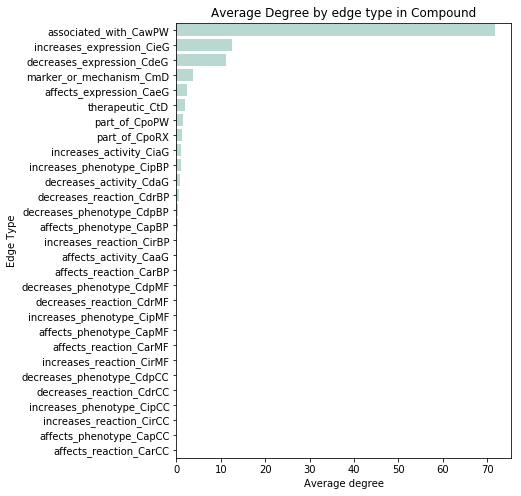

In [33]:
plot_avg_deg_for_kind('Compound')

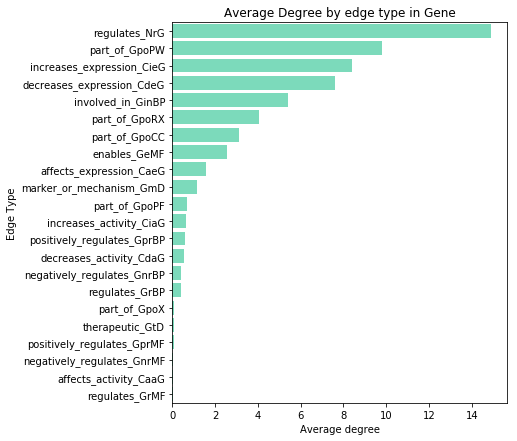

In [34]:
plot_avg_deg_for_kind('Gene')

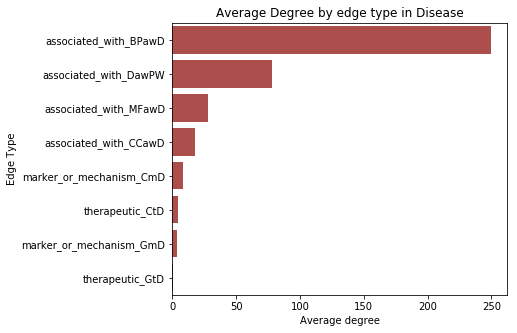

In [35]:
plot_avg_deg_for_kind('Disease')

# More plotting

In [36]:
from tqdm import tqdm
tqdm.pandas()

In [39]:
combo[['direction', 'action']] = combo['parent_ixn'].str.split('^', expand=True)

In [40]:
combo.head(2)

,start_id,end_id,type,parent_ixn,pub_med_ids,organism_id,abbv,direct_evidence,corrected_pvalue,inference_gene_symbol,...,date,assigned_by,experiments,support_type,start_name,end_name,start_label,end_label,direction,action
0,MESH:C000121,4313,decreases_activity_CdaG,decreases^activity,25899827,9606,CdaG,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,pipoxolan,matrix metallopeptidase 2,Compound,Gene,decreases,activity
1,MESH:C000121,4313,decreases_expression_CdeG,decreases^expression,25899827,9606,CdeG,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,pipoxolan,matrix metallopeptidase 2,Compound,Gene,decreases,expression


In [41]:
data = combo.query('start_label == "Compound" and end_label == "Gene"')
data = data.groupby(['start_id', 'end_id', 'action'])
data = data['direction'].progress_apply(lambda c: ', '.join([s.capitalize() for s in c]))

100%|██████████| 441510/441510 [00:50<00:00, 8723.37it/s]


In [42]:
data = data.reset_index()
data.head(2)

,start_id,end_id,action,direction
0,MESH:C000121,4313,activity,Decreases
1,MESH:C000121,4313,expression,Decreases


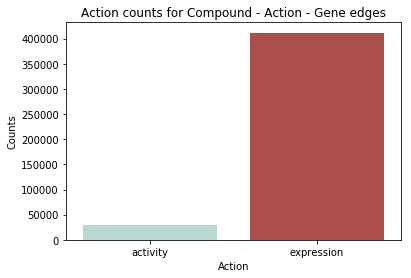

In [43]:
sns.countplot(x='action', data=data, palette=colors)
plt.xlabel('Action')
plt.ylabel('Counts')
plt.title('Action counts for Compound - Action - Gene edges');

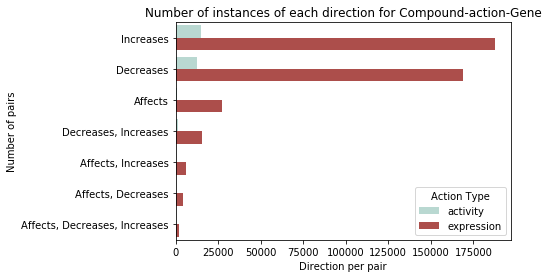

In [44]:
order = data['direction'].value_counts().index.tolist()
sns.countplot(y='direction', data=data, hue='action', order=order, palette=colors)
plt.xlabel('Direction per pair')
plt.ylabel('Number of pairs')
plt.legend(title='Action Type')
plt.title('Number of instances of each direction for Compound-action-Gene');

In [45]:
test = combo.query('start_label == "Compound" and end_label == "Gene"')
test = test.groupby(['start_id', 'end_id', 'direction'])
test = test['action'].progress_apply(lambda c: ', '.join([s.capitalize() for s in c]))

100%|██████████| 466918/466918 [00:53<00:00, 8680.23it/s]


In [46]:
test = test.reset_index()
test.head(2)

,start_id,end_id,direction,action
0,MESH:C000121,4313,decreases,"Activity, Expression"
1,MESH:C000121,4318,decreases,"Activity, Expression"


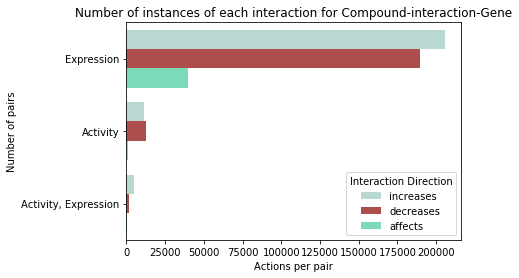

In [47]:
order = ['Expression', 'Activity', 'Activity, Expression']
h_order = ['increases', 'decreases', 'affects']

sns.countplot(y='action', data=test, hue='direction', order=order, hue_order=h_order, palette=colors)
plt.xlabel('Actions per pair')
plt.ylabel('Number of pairs')
plt.legend(title='Interaction Direction')
plt.title('Number of instances of each interaction for Compound-interaction-Gene');

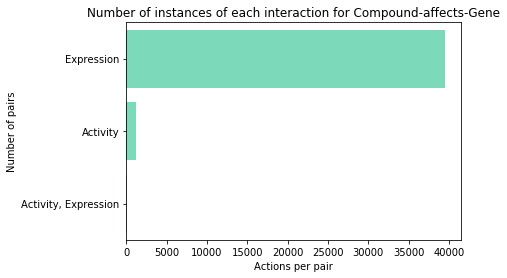

In [48]:
sns.countplot(y='action', data=test.query('direction == "affects"'), color=colors[2])
plt.xlabel('Actions per pair')
plt.ylabel('Number of pairs')
plt.title('Number of instances of each interaction for Compound-affects-Gene');

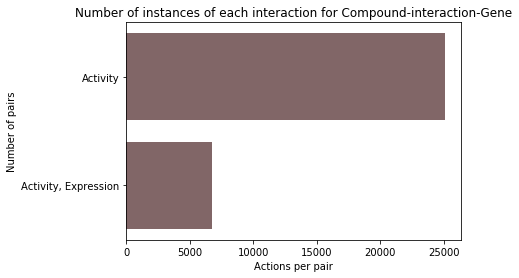

In [49]:
sns.countplot(y='action', data=test.query('action != "Expression"'), order=order[1:], color=colors[3])
plt.xlabel('Actions per pair')
plt.ylabel('Number of pairs')
plt.title('Number of instances of each interaction for Compound-interaction-Gene');

# Similar Analysis on compounds to GO-Terms

In [50]:
def group_terms(combo_df, start_type, end_type, group_on, count_col):
    data = combo_df.query('start_label == @start_type and end_label == @end_type')
    data = data.groupby(['start_id', 'end_id', group_on])
    data = data[count_col].progress_apply(lambda c: ', '.join([s.capitalize() for s in c]))
    return data.reset_index()

In [51]:
bp_directions = group_terms(combo, 'Compound', 'Biological Process', 'action', 'direction')

100%|██████████| 38332/38332 [00:04<00:00, 8655.32it/s]


In [52]:
bp_directions.head()

,start_id,end_id,action,direction
0,MESH:C000121,GO:0008283,phenotype,Decreases
1,MESH:C000121,GO:0016477,phenotype,Decreases
2,MESH:C000152,GO:0006702,phenotype,Decreases
3,MESH:C000152,GO:0008284,phenotype,"Decreases, Increases"
4,MESH:C000152,GO:0008284,reaction,Decreases


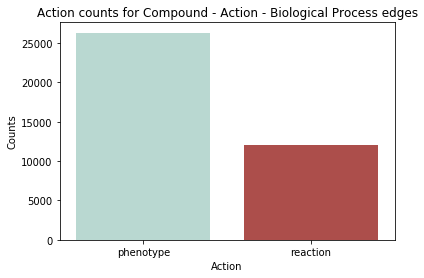

In [53]:
sns.countplot(x='action', data=bp_directions, palette=colors)
plt.xlabel('Action')
plt.ylabel('Counts')
plt.title('Action counts for Compound - Action - Biological Process edges');

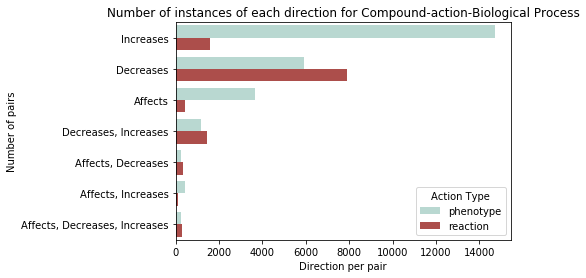

In [54]:
order = bp_directions['direction'].value_counts().index.tolist()
sns.countplot(y='direction', data=bp_directions, hue='action', order=order, palette=colors)
plt.xlabel('Direction per pair')
plt.ylabel('Number of pairs')
plt.legend(title='Action Type')
plt.title('Number of instances of each direction for Compound-action-Biological Process');

In [55]:
bp_actions = group_terms(combo, 'Compound', 'Biological Process', 'direction', 'action')
bp_actions.head(2)

100%|██████████| 37751/37751 [00:04<00:00, 8660.19it/s]


,start_id,end_id,direction,action
0,MESH:C000121,GO:0008283,decreases,Phenotype
1,MESH:C000121,GO:0016477,decreases,Phenotype


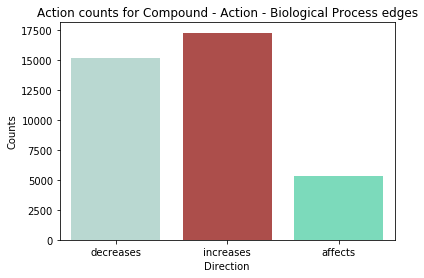

In [56]:
sns.countplot(x='direction', data=bp_actions, palette=colors)
plt.xlabel('Direction')
plt.ylabel('Counts')
plt.title('Action counts for Compound - Action - Biological Process edges');

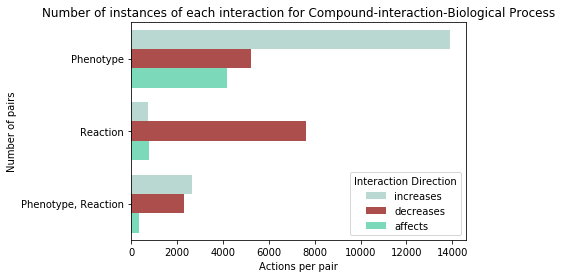

In [57]:
h_order = ['increases', 'decreases', 'affects']
order = bp_actions['action'].value_counts().index.tolist()

sns.countplot(y='action', data=bp_actions, hue='direction', order=order, hue_order=h_order, palette=colors)
plt.xlabel('Actions per pair')
plt.ylabel('Number of pairs')
plt.legend(title='Interaction Direction')
plt.title('Number of instances of each interaction for Compound-interaction-Biological Process');

# Save to Disk

In [17]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')
// hack to get the filename for this notebook

<IPython.core.display.Javascript object>

In [18]:
out_dir = Path('../2_pipeline/').joinpath(nb_name.split('.')[0]).joinpath('out').resolve()
out_dir.mkdir(parents=True, exist_ok=True)

In [21]:
gt.add_colons(all_nodes, id_name='identifier').to_csv(out_dir.joinpath('nodes_all.csv'), index=False)
gt.add_colons(filt_nodes, id_name='identifier').to_csv(out_dir.joinpath('nodes_filt.csv'), index=False)

gt.add_colons(edges).to_csv(out_dir.joinpath('edges.csv'), index=False)

In [62]:
edges.query('end_id == "InterPro:IPR004540"')

,start_id,end_id,type,parent_ixn,pub_med_ids,organism_id,abbv,direct_evidence,corrected_pvalue,inference_gene_symbol,qualifier,db_reference,evidence_code,with_or_from,date,assigned_by,experiments,support_type
6316938,85476,InterPro:IPR004540,part_of_GpoPF,NaN,NaN,NaN,GpoPF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
combo = gt.combine_nodes_and_edges(filt_nodes, edges)

In [66]:
combo_cols = ['start_id', 'start_name', 'start_label', 'type', 'end_id', 'end_name', 'end_label']

In [78]:
combo.query('start_id == "MESH:D003348" and end_id == "301"')[combo_cols]

,start_id,start_name,start_label,type,end_id,end_name,end_label


In [77]:
combo.query('end_id == "GO:0006954"')[combo_cols]

,start_id,start_name,start_label,type,end_id,end_name,end_label
3146038,MESH:C043836,naphthalan,Compound,decreases_phenotype_CdpBP,GO:0006954,inflammatory response,Biological Process
3152667,MESH:C080669,"5,7-dihydroxy-6-methoxy-2-phenylchromen-4-one",Compound,affects_phenotype_CapBP,GO:0006954,inflammatory response,Biological Process
3161651,MESH:C494417,huanglian,Compound,affects_phenotype_CapBP,GO:0006954,inflammatory response,Biological Process
3164310,MESH:C528128,xiongshao,Compound,affects_phenotype_CapBP,GO:0006954,inflammatory response,Biological Process
3166516,MESH:C561627,dabrafenib,Compound,decreases_reaction_CdrBP,GO:0006954,inflammatory response,Biological Process
3166517,MESH:C561627,dabrafenib,Compound,increases_phenotype_CipBP,GO:0006954,inflammatory response,Biological Process
3169921,MESH:D000077185,Resveratrol,Compound,affects_phenotype_CapBP,GO:0006954,inflammatory response,Biological Process
3169922,MESH:D000077185,Resveratrol,Compound,affects_reaction_CarBP,GO:0006954,inflammatory response,Biological Process
3171569,MESH:D000077237,Arsenic Trioxide,Compound,affects_phenotype_CapBP,GO:0006954,inflammatory response,Biological Process
3176365,MESH:D000535,Aluminum,Compound,increases_phenotype_CipBP,GO:0006954,inflammatory response,Biological Process


In [70]:
combo.query('start_id == "301" and end_label== "Pathway"')[combo_cols]

,start_id,start_name,start_label,type,end_id,end_name,end_label
2431880,301,annexin A1,Gene,part_of_GpoPW,REACT:R-HSA-373076,Class A/1 (Rhodopsin-like receptors),Pathway
2431881,301,annexin A1,Gene,part_of_GpoPW,REACT:R-HSA-1280215,Cytokine Signaling in Immune system,Pathway
2431882,301,annexin A1,Gene,part_of_GpoPW,REACT:R-HSA-444473,Formyl peptide receptors bind formyl peptides ...,Pathway
2431883,301,annexin A1,Gene,part_of_GpoPW,REACT:R-HSA-418594,G alpha (i) signalling events,Pathway
2431884,301,annexin A1,Gene,part_of_GpoPW,REACT:R-HSA-416476,G alpha (q) signalling events,Pathway
2431885,301,annexin A1,Gene,part_of_GpoPW,REACT:R-HSA-881907,Gastrin-CREB signalling pathway via PKC and MAPK,Pathway
2431886,301,annexin A1,Gene,part_of_GpoPW,REACT:R-HSA-388396,GPCR downstream signaling,Pathway
2431887,301,annexin A1,Gene,part_of_GpoPW,REACT:R-HSA-500792,GPCR ligand binding,Pathway
2431888,301,annexin A1,Gene,part_of_GpoPW,REACT:R-HSA-168256,Immune System,Pathway
2431889,301,annexin A1,Gene,part_of_GpoPW,REACT:R-HSA-6785807,Interleukin-4 and 13 signaling,Pathway


In [73]:
filt_nodes.query('id == "GO:0006954"')

,id,name,label,tree_numbers,drug_bank_ids,alt_disease_ids,gene_symbol,alt_gene_ids,bio_gridids,pharm_gkbids,uni_prot_ids,uniprot_id,mesh_ids,chebi_ids
707449,GO:0006954,inflammatory response,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
nids = ['GO:0001776',
'GO:0007159',
'GO:0002521',
'GO:0070661',
'GO:0002443',
'GO:0071887',
'GO:0043299',
'GO:0050900',
'GO:0045321',
'GO:0001909']

filt_nodes.query('id in @nids')

,id,name,label,tree_numbers,drug_bank_ids,alt_disease_ids,gene_symbol,alt_gene_ids,bio_gridids,pharm_gkbids,uni_prot_ids,uniprot_id,mesh_ids,chebi_ids
703563,GO:0001776,leukocyte homeostasis,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
703689,GO:0001909,leukocyte mediated cytotoxicity,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704206,GO:0002443,leukocyte mediated immunity,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704284,GO:0002521,leukocyte differentiation,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707598,GO:0007159,leukocyte cell-cell adhesion,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722414,GO:0043299,leukocyte degranulation,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724145,GO:0045321,leukocyte activation,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728331,GO:0050900,leukocyte migration,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732954,GO:0070661,leukocyte proliferation,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734137,GO:0071887,leukocyte apoptotic process,Biological Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
filt_nodes.query('label == "Disease"').count()

id                 7201
name               7201
label              7201
tree_numbers       7201
drug_bank_ids         0
alt_disease_ids    5078
gene_symbol           0
alt_gene_ids          0
bio_gridids           0
pharm_gkbids          0
uni_prot_ids          0
uniprot_id            0
mesh_ids              0
chebi_ids             0
dtype: int64